# Ecosystem Stabiltiy & Hypervolumes

In [1]:
source('00_hv_functions.R')
require('dplyr')

Loading required package: vegan
Loading required package: permute
Loading required package: lattice
This is vegan 2.5-2
Loading required package: hypervolume
Loading required package: Rcpp
Loading required package: rgl
Warning message in rgl.init(initValue, onlyNULL):
“RGL: unable to open X11 display”Warning message:
“'rgl_init' failed, running with rgl.useNULL = TRUE”Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



### Sorted Data

In [2]:
# load sorted tree data (Species count matrix)
tree_df <- read.csv("../Results/trees_matrix.csv", header=T, row.names=1)

# make into workable matrix in R
tree_cm <- count_matrix(tree_df)

# and caluculate relative abundances
tree_am <- rel_abnd(tree_df)

In [13]:
unique(tree_df$plot)

[1] "BNorth" "BSouth" "Belian" "DC1"    "DC2"    "E"      "LF"     "Seraya"
[9] "Tower"

## Species Ordination: this is where i'm not certain

- Nonmetric multidimensional scaling from reading this http://ordination.okstate.edu/overview.htm#Nonmetric_Multidimensional_Scaling
- I've done it based on species counts at each subplot (hv are then caluclated at plot level). I think by doing it like this it means plots are comparable but im not convinced...
- Does mean that axis dont mean anything so maybe not useful anyway?
- not distance preserving, hypervolumes package doesnt recommend this... http://www.benjaminblonder.org/hypervolume_faq.html

In [3]:
# Nonmetric Multidimensional Scaling
#tree_count_mds <- metaMDS(tree_cm, k = 3, trymax = 100)
#tree_relab_mds <- metaMDS(tree_am, k = 3, trymax = 100)

# save the output so  dont have to wait each time...
#save(tree_count_mds, tree_relab_mds, file = "../Results/tree_mds_out.Rdata")

## Compare the hypervolumes!

In [4]:
# load in the output from ordination
load("../Results/tree_mds_out.Rdata")

tree_df   <- as.data.frame(tree_relab_mds$points)

# split the subplot_plot_census column
tree_df$plot    <- unlist(strsplit(row.names(tree_df), "_"))[ c(T,F,F)] 
tree_df$subplot <- unlist(strsplit(row.names(tree_df), "_"))[ c(F,T,F)] 
tree_df$census  <- unlist(strsplit(row.names(tree_df), "_"))[ c(F,F,T)]

### svm *vs* gaussion?
- from what i can tell there is alot of randomness in the output of svm vs gaussion...
    - but they do often seem easier to interpret

In [5]:
# pick a plot ('BNorth' 'BSouth' 'Belian' 'DC1' 'DC2' 'E' 'LF' 'Seraya' 'Tower')
plot <- 'Tower'

#### svm
- Constructs a hypervolume by building a one-class support vector machine that classifies data points as ’in’ and other locations as ’out’. This is accomplished by 1) transforming the input data into a high-dimensional nonlinear space in which the data points can be optimally separated from background by a single hyperplane, 2) back-transforming the hyperplane into the original space, 3) delineating an adaptive grid of random points near the original data points, and 4) using the SVM to predict if each of these points is in or out.


Building Hypervolume  4  of  4

Comparing Hypervolume pairs 6  of  6



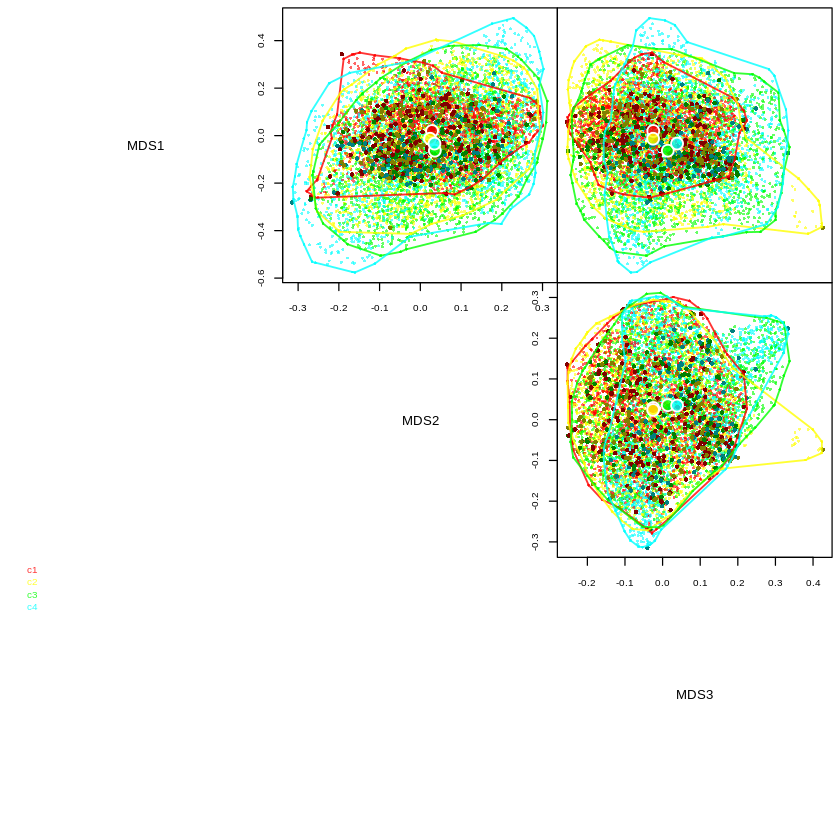

In [6]:
svm <- compare_hypervolumes(df = subset(tree_df, plot == plot), compare = "census", type = "svm", plot = TRUE)

#### gaussian
- Constructs a hypervolume by building a Gaussian kernel density estimate on an adaptive grid of random points wrapping around the original data points. The bandwidth vector reflects the axisaligned standard deviations of a hyperelliptical kernel.


Building Hypervolume  4  of  4

Comparing Hypervolume pairs 6  of  6



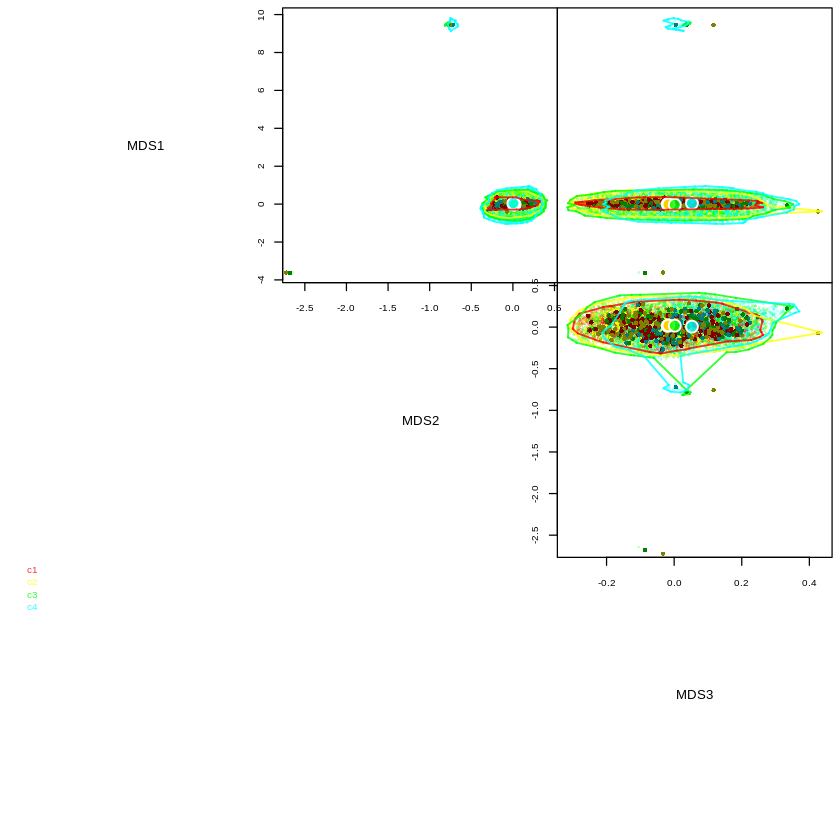

In [7]:
gaussian <- compare_hypervolumes(df = subset(tree_df, plot == plot), compare = "census", type = "gaussian", plot = TRUE)

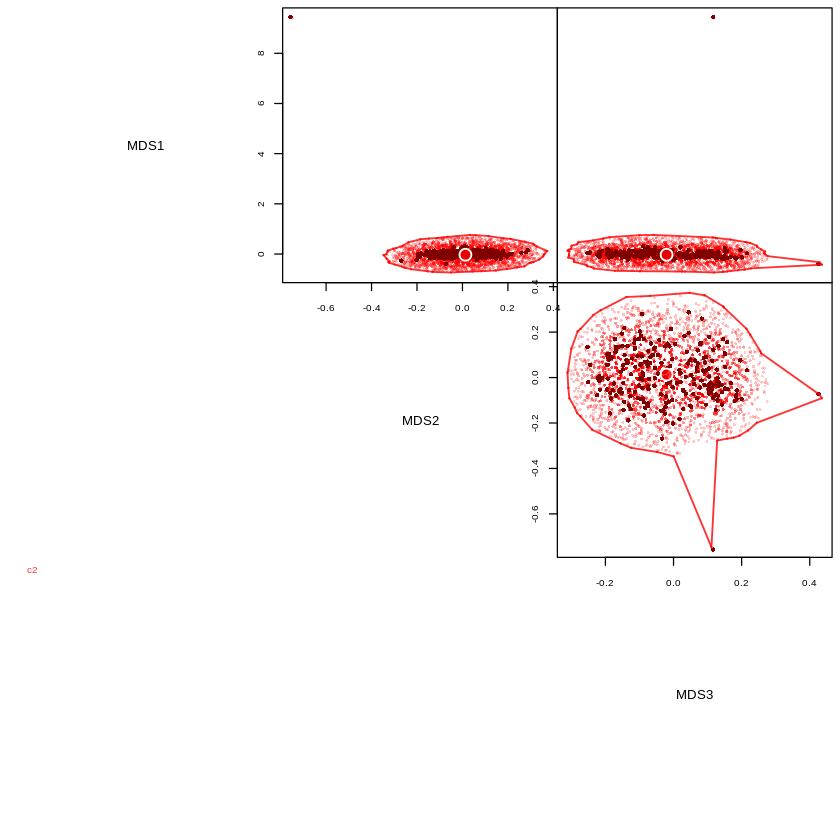

In [8]:
plot(gaussian@hvlist[[c("c2")]], show.3d = F)

## Compare Plots


Building Hypervolume  9  of  9

Comparing Hypervolume pairs 36  of  36



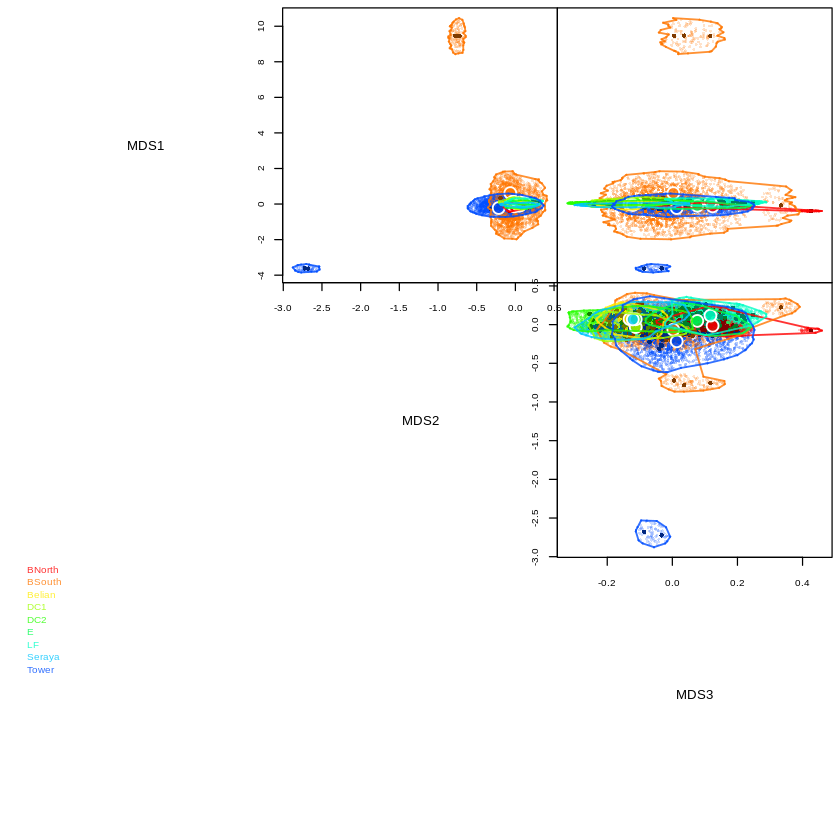

In [9]:
# pick a census ('c1' 'c2' 'c3' 'c4')
census <- "c1"

compare_census <- compare_hypervolumes(df = subset(tree_df, census == census), compare = "plot", type = "gaussian", plot = TRUE)

In [12]:
compare_census

An object of class "hv_comp"
Slot "name":
[1] "Census: c1 comparing plots"

Slot "hvlist":
HypervolumeList with 9 elements:


$`BNorth` (1 / 9) 
***** Object of class Hypervolume *****
Name: BNorth
Method: Gaussian kernel density estimate
Number of data points (after weighting): 96
Dimensionality: 3
Volume: 0.008668
Random point density: 2968913.386969
Number of random points: 25735
Random point values:
	min: 0.164
	mean: 1.145
	median: 0.641
	max:6.301
Parameters:
	kde.bandwidth: 0.02139708 0.02511746 0.02290521
	samples.per.point: 563
	sd.count: 3
	quantile.requested: 0.95
	quantile.requested.type: probability

$`BSouth` (2 / 9) 
***** Object of class Hypervolume *****
Name: BSouth
Method: Gaussian kernel density estimate
Number of data points (after weighting): 100
Dimensionality: 3
Volume: 0.758580
Random point density: 30731.109773
Number of random points: 23312
Random point values:
	min: 0.002
	mean: 0.013
	median: 0.005
	max:0.096
Parameters:
	kde.bandwidth: 0.69037639 0.0688741

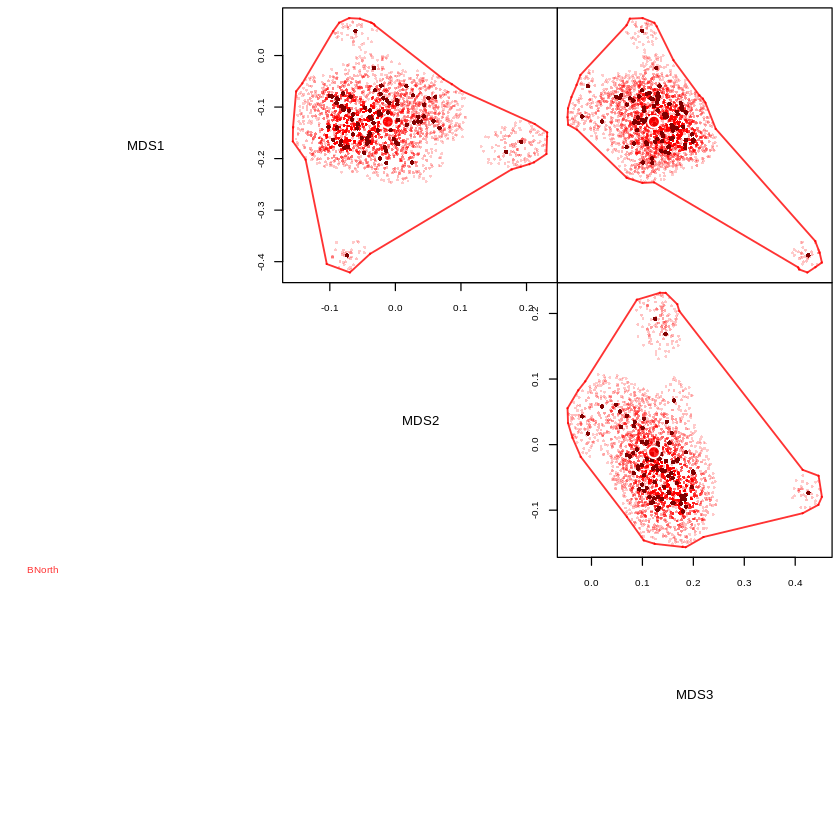

In [61]:
plot(compare_census@hvlist[[c("BNorth")]], show.3d = F)

## Fuctional Traits

#### Trees
- Currently using
    - Biomass
    - height
    - simpsons diversity
    - variance in biomass
    
- Other possabilities/is data aviable? - need to email Terhi
    - Seeds
    - Leaves
    - etc.
    
#### Email ? re. Saplings

##### For mammals
- sex
- weight measures
- parasites
- Age
- Fat_score and a load of others which i'm not sure what they are (Need to talk to Philip)
    - HF
    - E
    - AGD
    - HB
    - T
    - MZ
- stuff from PanTHERIA - but not really (very holey data!)
    
#### No data for beetles
- need to email Ada,

In [10]:
tree_func <- read.csv("../Results/tree_axis.csv")
tree_func[is.na(tree_func)] <- 0
tree_func <- tree_func[c("plot", "subplot", "census", "simpdv", "avghgtnorm", "tbiomcnorm", "biovar")]

#### Census


Building Hypervolume  4  of  4

Comparing Hypervolume pairs 6  of  6



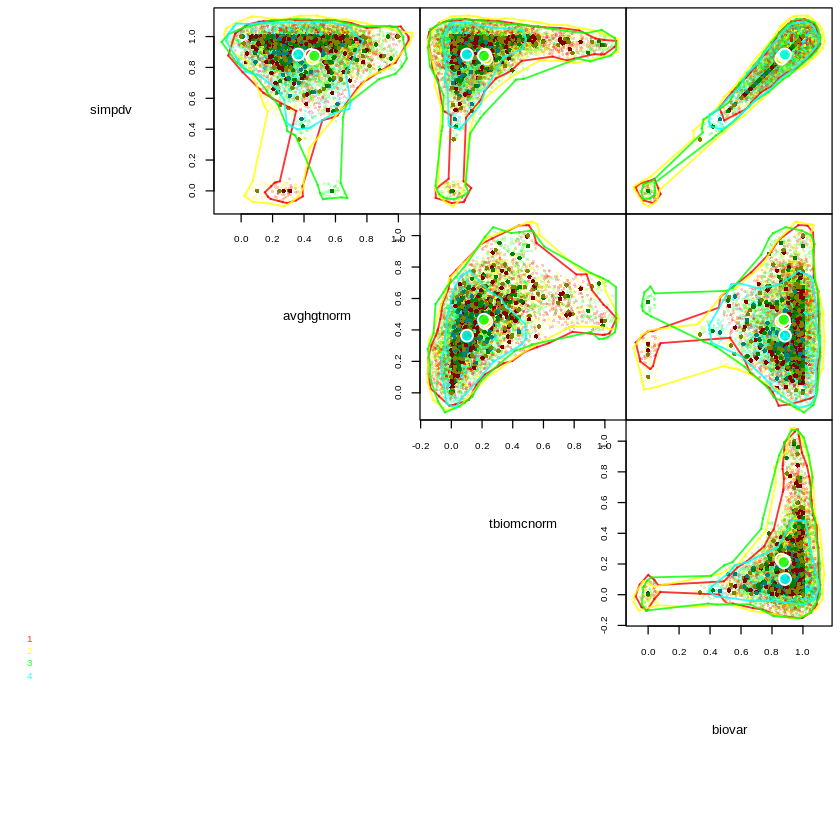

In [11]:
# Choose a plot
plot = "Tower"

cc_func <- compare_hypervolumes(df = subset(tree_func, plot == plot), compare = "census", type = "gaussian", plot = TRUE)

#### Plots


Building Hypervolume  9  of  9

Comparing Hypervolume pairs 36  of  36



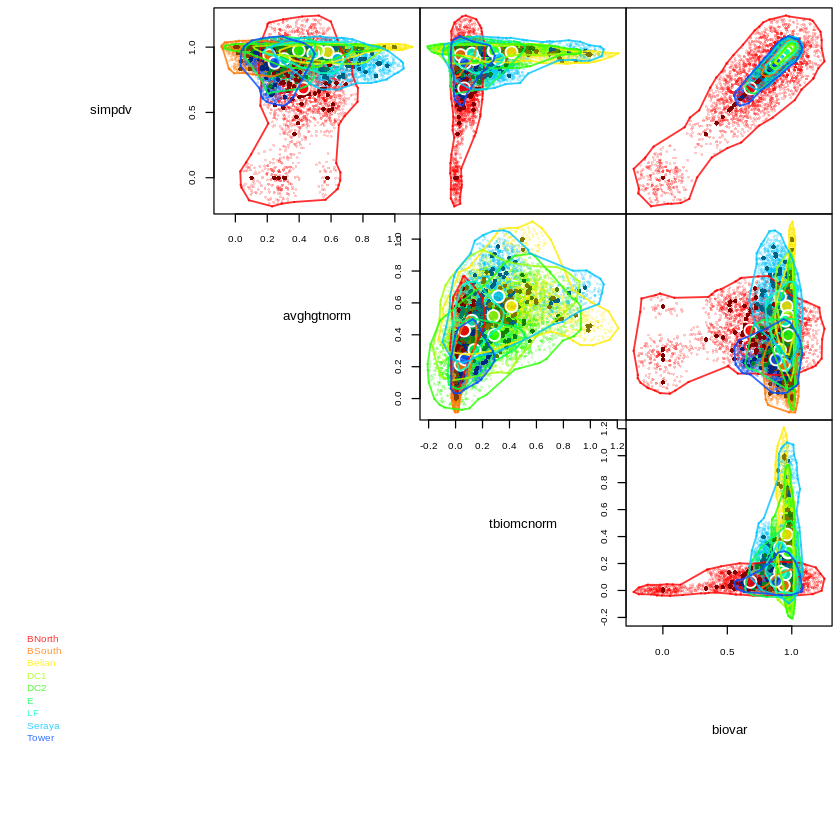

In [65]:
# Choose a census
census = "c1"

cp_func <- compare_hypervolumes(df = subset(tree_func, census == census), compare = "plot", type = "gaussian", plot = TRUE)

In [ ]:
cc_func